<head><p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='black'> <center>
       Bioseñales y Sistemas </center></font></h1>
<p3><center><b><font color='black' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>
<h2><font color='black'> <center>
Proyecto 3</center></font></h2>
<h3><font color='black'> <center>
Danna Isabella Garcia Saenz - Solanlly Evenedy Montoya Rivera </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1></head>

In [57]:
#Instalo las librerias necesarias
from scipy.io import loadmat
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from csv import reader as reader_csv;
import scipy.signal as signal;
import pandas as pd
import glob
import math
import os
import shutil
from scipy.stats import linregress
from scipy.signal import find_peaks
import seaborn as sns
from itertools import combinations
from scipy.stats import mannwhitneyu
from itertools import combinations
from scipy.stats import levene
from scipy.stats import kstest

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


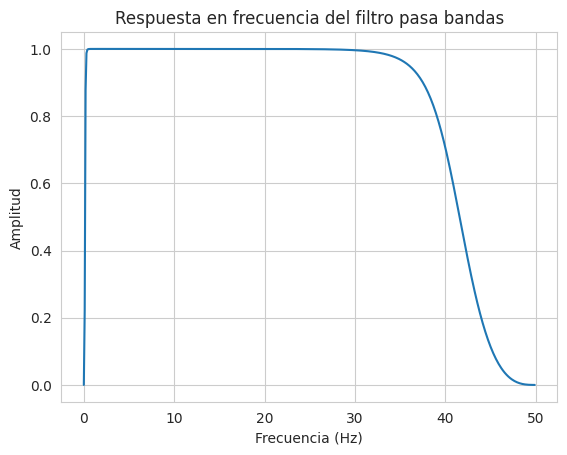

Coeficientes del numerador (b): [ 0.52205413  0.         -1.56616239  0.          1.56616239  0.
 -0.52205413]
Coeficientes del denominador (a): [ 1.         -1.22097404 -1.09931528  0.98157041  0.94737128 -0.33646268
 -0.27218541]


In [58]:
from scipy.signal import iirfilter, freqz
import matplotlib.pyplot as plt
import numpy as np

# Especificaciones del filtro
N = 3  # Orden del filtro
Wn = [0.16, 40]  # Frecuencias de corte (en Hz)
fs = 100  # Frecuencia de muestreo (en Hz)

# Diseño del filtro IIR pasa bandas
b, a = iirfilter(N, Wn, btype='band', ftype='butter', fs=fs)

# Visualización de la respuesta en frecuencia del filtro
w, h = freqz(b, a, fs=fs)
plt.plot(w, abs(h))
plt.title('Respuesta en frecuencia del filtro pasa bandas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Coeficientes del filtro
print("Coeficientes del numerador (b):", b)
print("Coeficientes del denominador (a):", a)


In [59]:
def tkeo(signal): #función para aplicar el operador TKEO a una señal
    tkeo_signal = np.square(signal[1:-1]) - (signal[:-2] * signal[2:])
    return tkeo_signal

In [60]:
from scipy import signal

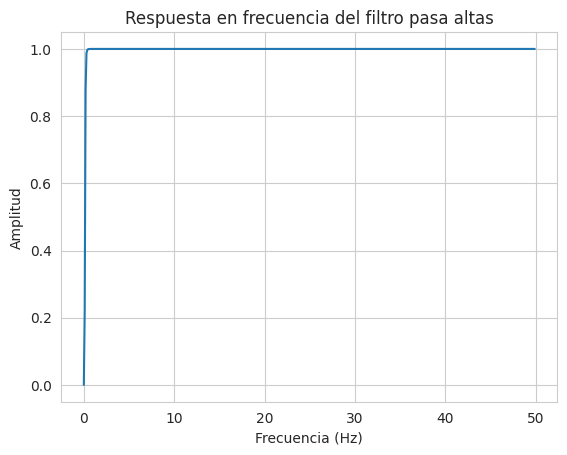

Coeficientes del numerador (b): [ 0.98999723 -2.96999168  2.96999168 -0.98999723]
Coeficientes del denominador (a): [ 1.         -2.97989389  2.9599894  -0.98009451]


In [61]:
from scipy.signal import iirfilter, freqz
import matplotlib.pyplot as plt
import numpy as np

# Especificaciones del filtro
N = 3 # Orden del filtro
Wn = 0.16  # Frecuencia de corte (en Hz)
fs = 100  # Frecuencia de muestreo (en Hz)

# Diseño del filtro IIR pasa altas
b, a = iirfilter(N, Wn, btype='high', ftype='butter', fs=fs)

# Visualización de la respuesta en frecuencia del filtro
w, h = freqz(b, a, fs=fs)
plt.plot(w, abs(h))
plt.title('Respuesta en frecuencia del filtro pasa altas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Coeficientes del filtro
print("Coeficientes del numerador (b):", b)
print("Coeficientes del denominador (a):", a)

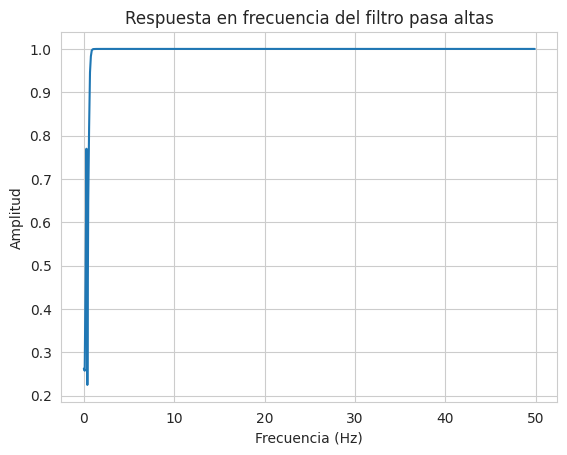

Coeficientes del numerador (b): [   0.97146805   -8.74321246   34.97284984  -81.6033163   122.40497445
 -122.40497445   81.6033163   -34.97284984    8.74321246   -0.97146805]
Coeficientes del denominador (a): [   1.           -8.94210655   35.53852717  -82.39067533  122.79294834
 -122.00560458   80.81595706  -34.41368447    8.54838853   -0.94375017]


In [62]:
#librerias necesarias
from scipy.signal import iirfilter, freqz
import matplotlib.pyplot as plt
import numpy as np

#especificaciones del filtro a utilizar
N = 9 #orden del filtro
Wn = 0.16  #frecuencia de corte (en Hz)
fs = 100  #frecuencia de muestreo (en Hz)

b, a = iirfilter(N, Wn, btype='high', ftype='butter', fs=fs) #diseño del filtro IIR pasa altas

#visualización de la respuesta en frecuencia del filtro
w, h = freqz(b, a, fs=fs)
plt.plot(w, abs(h))
plt.title('Respuesta en frecuencia del filtro pasa altas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

#coeficientes del filtro
print("Coeficientes del numerador (b):", b)
print("Coeficientes del denominador (a):", a)

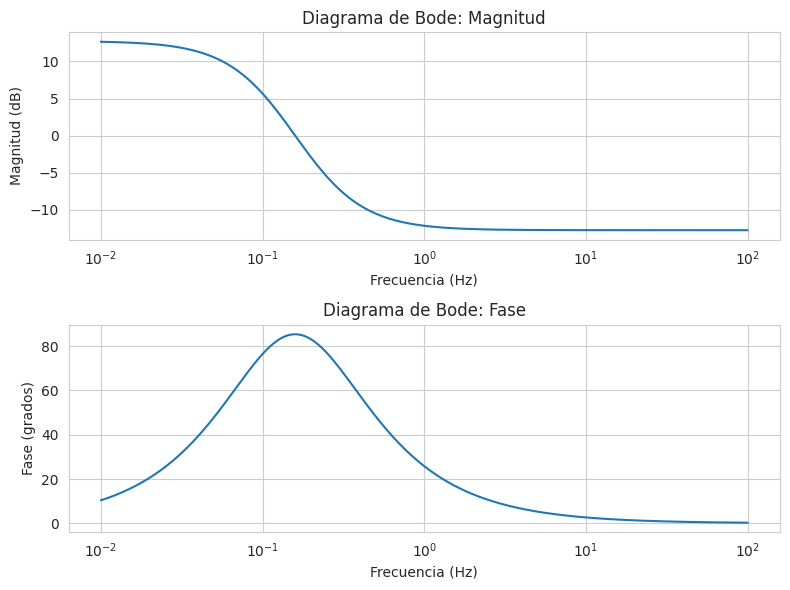

Coeficientes del numerador (b): [   0.97146805   -8.74321246   34.97284984  -81.6033163   122.40497445
 -122.40497445   81.6033163   -34.97284984    8.74321246   -0.97146805]
Coeficientes del denominador (a): [   1.           -8.94210655   35.53852717  -82.39067533  122.79294834
 -122.00560458   80.81595706  -34.41368447    8.54838853   -0.94375017]


In [63]:
#librerias necesarias
from scipy.signal import iirfilter, bode
import matplotlib.pyplot as plt
import numpy as np

#especificaciones filtro
N = 9  #orden
Wn = 0.16  #frecuencia de corte (Hz)
fs = 100  #frecuencia de muestreo (Hz)
b, a = iirfilter(N, Wn, btype='high', ftype='butter', fs=fs)  #diseño (filtro IIR pasa altas)

#diagrama de Bode
w, mag, phase = bode(iirfilter(N, Wn, btype='high', ftype='butter'), w=np.logspace(-2, 2, 1000) * 2 * np.pi * fs / 100)

#grafico el diagrama de Bode
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
axs[0].semilogx(w / (2 * np.pi), mag)
axs[0].set_title('Diagrama de Bode: Magnitud')
axs[0].set_xlabel('Frecuencia (Hz)')
axs[0].set_ylabel('Magnitud (dB)')
axs[0].grid(True)

axs[1].semilogx(w / (2 * np.pi), phase)
axs[1].set_title('Diagrama de Bode: Fase')
axs[1].set_xlabel('Frecuencia (Hz)')
axs[1].set_ylabel('Fase (grados)')
axs[1].grid(True)
plt.tight_layout()
plt.show()

#coeficientes del filtro
print("Coeficientes del numerador (b):", b)
print("Coeficientes del denominador (a):", a)

In [66]:
# librerías necesarias
from scipy.signal import iirfilter, filtfilt
import matplotlib.pyplot as plt
import numpy as np
import os

# especificaciones del filtro a utilizar
N = 9  # orden del filtro
Wn = 0.2  # frecuencia de corte (en Hz)
fs = 100  # frecuencia de muestreo (en Hz)

b, a = iirfilter(N, Wn, btype='high', ftype='butter', fs=fs)  # diseño del filtro IIR pasa altas

# para confirmar la ubicación de los datos de los sujetos
carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado"

archivos = os.listdir(carpeta_principal)  # obtener la lista de archivos en la carpeta

for archivo in archivos:
    if archivo.endswith('.txt'):  # asegurarse de que solo se procesen archivos de texto
        ruta_archivo = os.path.join(carpeta_principal, archivo)

        # Leer datos del archivo
        with open(ruta_archivo, 'r') as f:
            datos = f.readlines()

        # Separar los datos en columnas y convertirlos a arreglos numéricos
        datos = np.array([[float(valor.split()[0]), int(valor.split()[1])] for valor in datos])

        # Extraer la primera columna que corresponde a los datos a filtrar
        datos_a_filtrar = datos[:, 0]

        # Aplicar el filtro
        datos_filtrados = filtfilt(b, a, datos_a_filtrar)

        # Combinar los datos filtrados con la segunda columna (indicador de extensión o flexión)
        datos_filtrados = np.column_stack((datos_filtrados, datos[:, 1]))

        # Guardar los datos filtrados en otro archivo (opcional)
        ruta_archivo_filtrado = os.path.join(carpeta_principal, archivo.replace('.txt', '_filtrado.txt'))
        with open(ruta_archivo_filtrado, 'w') as f:
            for fila in datos_filtrados:
                f.write(f"{fila[0]} {int(fila[1])}\n")

In [67]:
#para confirmamr la ubicacion de los datos de los sujetos

carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado/datos_filtrados"

archivos = os.listdir(carpeta_principal) #obtener la lista de archivos en la carpeta
print(archivos)

archivos[0]

['sujeto1_etiquetado_filtrado.txt', 'sujeto2_etiquetado_filtrado.txt', 'sujeto3_etiquetado_filtrado.txt', 'sujeto4_etiquetado_filtrado.txt', 'sujeto5_etiquetado_filtrado.txt', 'sujeto6_etiquetado_filtrado.txt', 'sujeto7_etiquetado_filtrado.txt', 'sujeto8_etiquetado_filtrado.txt', 'sujeto9_etiquetado_filtrado.txt', 'sujeto10_etiquetado_filtrado.txt']


'sujeto1_etiquetado_filtrado.txt'

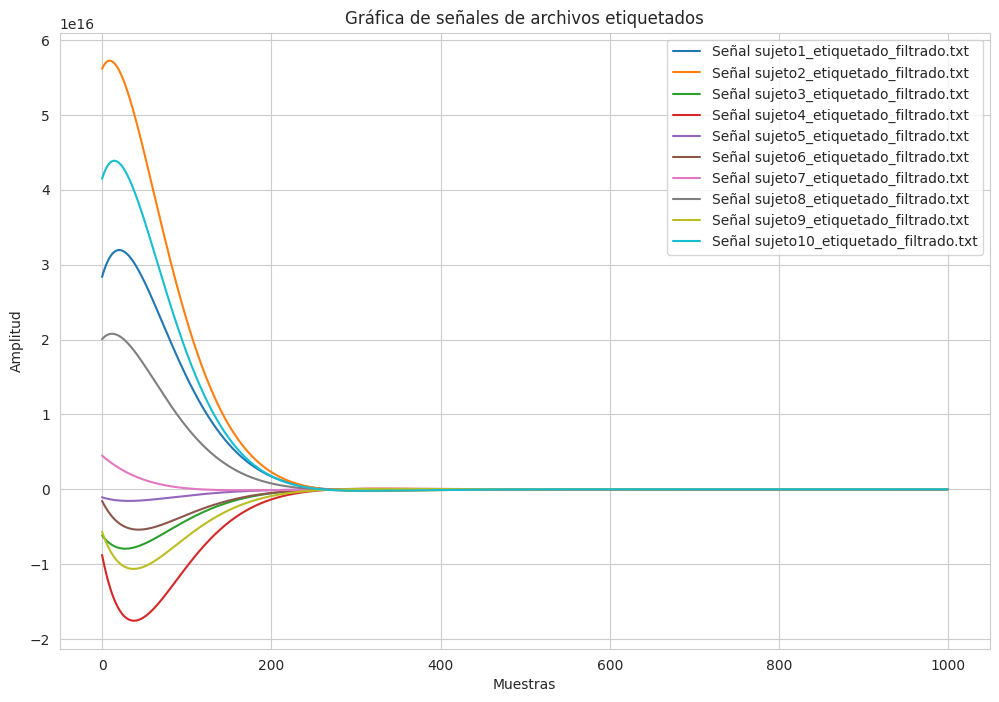

In [68]:
archivos = [archivo for archivo in os.listdir(carpeta_principal) if archivo.endswith('.txt')] #obtener la lista de archivos en la carpeta

plt.figure(figsize=(12, 8)) #configura la gráfica

for archivo in archivos: #iterar sobre cada archivo
    ruta_archivo = os.path.join(carpeta_principal, archivo) #ruta completa del archivo
    with open(ruta_archivo, 'r') as file: #lee los datos del archivo
        datos = file.readlines()

    #extraer la primera columna (datos de la señal)
    signal = [float(dato.strip().split()[0]) for dato in datos]

    #graficar la señal
    plt.plot(signal, label=f'Señal {archivo}')

plt.title('Gráfica de señales de archivos etiquetados')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

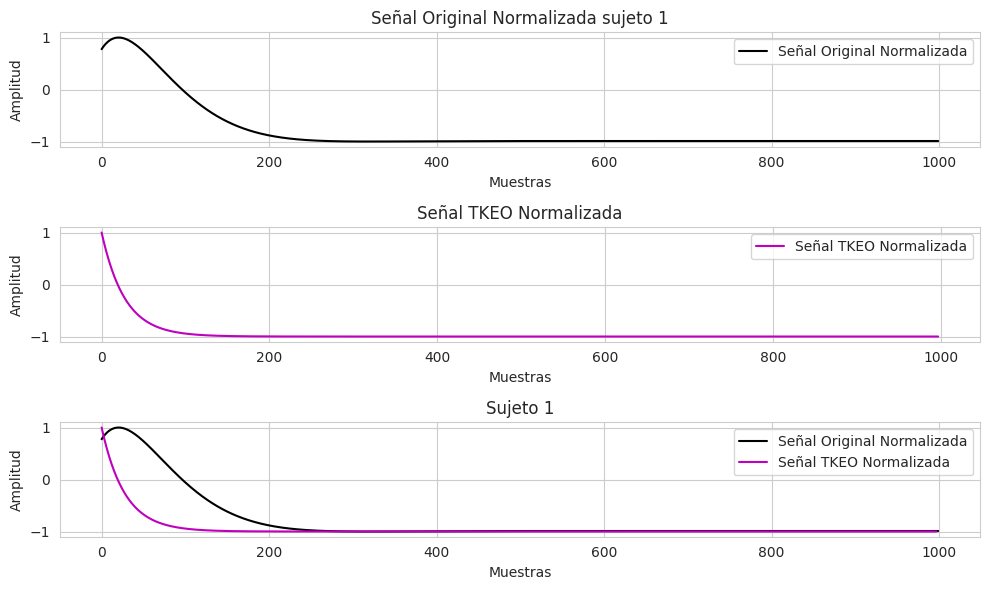

In [69]:
def tkeo(signal): #función para aplicar el operador TKEO a una señal
    tkeo_signal = np.square(signal[1:-1]) - (signal[:-2] * signal[2:])
    return tkeo_signal


ruta_archivo = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado/datos_filtrados/sujeto1_etiquetado_filtrado.txt" #ruta del archivo a procesar
with open(ruta_archivo, 'r') as file: #lee los datos del archivo
    datos = file.readlines()

#convertir los datos a una lista de valores numéricos y etiquetas de gestos
signal = np.array([float(dato.strip().split()[0]) for dato in datos])
gestos = [dato.strip().split()[1] for dato in datos]


tkeo_signal = tkeo(signal) #aplicar el operador TKEO a la señal
signal_normalized = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 2 - 1 #normalizar la señal original y la señal TKEO
tkeo_signal_normalized = (tkeo_signal - np.min(tkeo_signal)) / (np.max(tkeo_signal) - np.min(tkeo_signal)) * 2 - 1

#graficar la señal original y la señal TKEO normalizadas
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(signal_normalized, label='Señal Original Normalizada', color='black')
plt.title('Señal Original Normalizada sujeto 1')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 2)
plt.plot(tkeo_signal_normalized, label='Señal TKEO Normalizada', color='m')
plt.title('Señal TKEO Normalizada')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(3, 1, 3)
plt.plot(signal_normalized, label='Señal Original Normalizada', color='black')
plt.plot(tkeo_signal_normalized, label='Señal TKEO Normalizada', color='m')
plt.title('Sujeto 1')
plt.legend()
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()



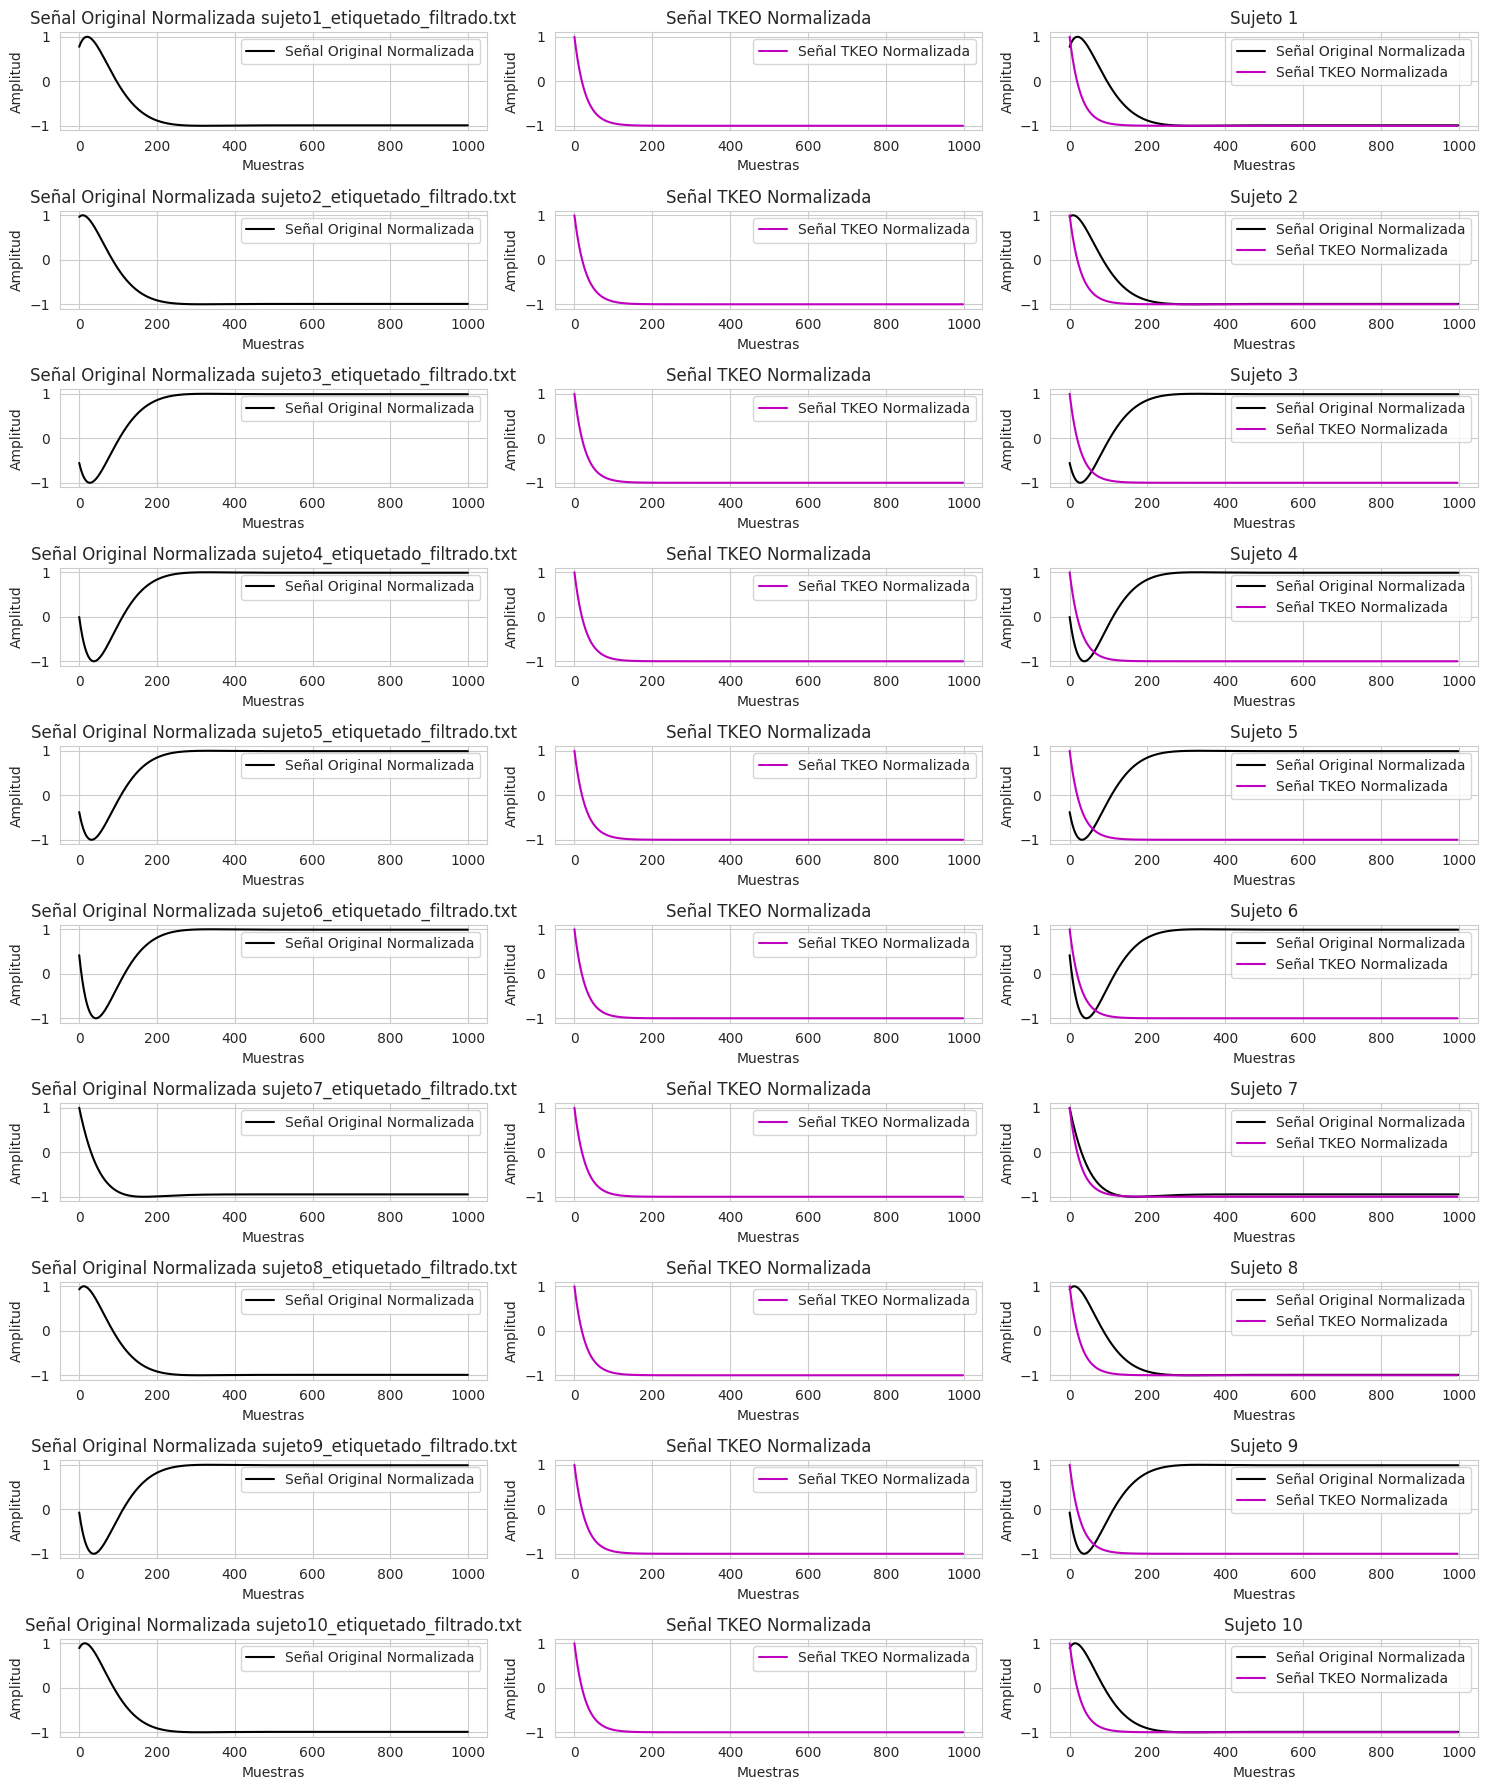

In [70]:
#configurar la gráfica
plt.figure(figsize=(15, 18))

for i, archivo in enumerate(archivos): #iterar sobre cada archivo
    ruta_archivo = os.path.join(carpeta_principal, archivo) #construir la ruta completa del archivo

    with open(ruta_archivo, 'r') as file:  # Leer los datos del archivo
        datos = file.readlines()

    signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #convertir los datos a una lista de valores numéricos y etiquetas de gestos
    gestos = [dato.strip().split()[1] for dato in datos]

    tkeo_signal = tkeo(signal) # Aplicar el operador TKEO a la señal
    signal_normalized = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 2 - 1 #normalizar la señal original y la señal TKEO
    tkeo_signal_normalized = (tkeo_signal - np.min(tkeo_signal)) / (np.max(tkeo_signal) - np.min(tkeo_signal)) * 2 - 1

    #fraficar la señal original y la señal TKEO normalizadas
    plt.subplot(len(archivos), 3, i*3 + 1)
    plt.plot(signal_normalized, label='Señal Original Normalizada', color='black')
    plt.title(f'Señal Original Normalizada {archivo}')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.legend()

    plt.subplot(len(archivos), 3, i*3 + 2)
    plt.plot(tkeo_signal_normalized, label='Señal TKEO Normalizada', color='m')
    plt.title('Señal TKEO Normalizada')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.legend()

    plt.subplot(len(archivos), 3, i*3 + 3)
    plt.plot(signal_normalized, label='Señal Original Normalizada', color='black')
    plt.plot(tkeo_signal_normalized, label='Señal TKEO Normalizada', color='m')
    plt.title(f'Sujeto {i+1}')
    plt.xlabel('Muestras')
    plt.ylabel('Amplitud')
    plt.legend()

plt.tight_layout()
plt.show()


In [71]:
def tkeo(signal):
    signal_padded = np.pad(signal, (1, 1), mode='constant', constant_values=0) #rellenar los bordes con ceros

    tkeo_signal = np.square(signal_padded[1:-1]) - (signal_padded[:-2] * signal_padded[2:]) #aplicar el operador TKEO
    return tkeo_signal

def extract_features_tkeo(signal, tkeo_signal, gestos):
    features = []
    gestos_unicos = set(gestos)

    for gesto in gestos_unicos:
        indices = [i for i, g in enumerate(gestos) if g == gesto]
        signal_gesto = signal[indices]
        tkeo_signal_gesto = tkeo_signal[indices]

        rms = np.sqrt(np.mean(signal_gesto ** 2))  #RMS
        rms_tkeo = np.sqrt(np.mean(tkeo_signal_gesto ** 2))
        varianza = np.var(signal_gesto) #varianza
        varianza_tkeo = np.var(tkeo_signal_gesto)
        mean_absolute_value = np.mean(np.abs(signal_gesto)) #mean Absolute Value
        mean_absolute_value_tkeo = np.mean(np.abs(tkeo_signal_gesto))
        diff_signal = np.diff(signal_gesto) #mean Absolute Value Slope
        diff_tkeo_signal = np.diff(tkeo_signal_gesto)
        mean_absolute_value_slope = np.mean(np.abs(diff_signal))
        mean_absolute_value_slope_tkeo = np.mean(np.abs(diff_tkeo_signal))
        slope_sign_changes = np.sum(np.abs(np.diff(np.sign(diff_signal)))) / 2 #slope Sign Changes
        slope_sign_changes_tkeo = np.sum(np.abs(np.diff(np.sign(diff_tkeo_signal)))) / 2
        wave_form_length = np.sum(np.abs(diff_signal)) # Wave form length
        wave_form_length_tkeo = np.sum(np.abs(diff_tkeo_signal))
        zero_crossing = np.sum(np.abs(np.diff(signal_gesto > 0))) / 2 #zero Crossing
        zero_crossing_tkeo = np.sum(np.abs(np.diff(tkeo_signal_gesto > 0))) / 2

        features.append([gesto, rms, varianza, mean_absolute_value, mean_absolute_value_slope, slope_sign_changes, wave_form_length, zero_crossing, rms_tkeo, varianza_tkeo, mean_absolute_value_tkeo, mean_absolute_value_slope_tkeo, slope_sign_changes_tkeo, wave_form_length_tkeo, zero_crossing_tkeo])

    return features

ruta_archivo = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado/datos_filtrados/sujeto1_etiquetado_filtrado.txt" #ruta del archivo a procesa
with open(ruta_archivo, 'r') as file: #lee los datos del archivo
    datos = file.readlines()

signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #convierte los datos a una lista de valores numéricos y etiquetas de gestos
gestos = [dato.strip().split()[1] for dato in datos]

tkeo_signal = tkeo(signal) #aplicar el operador TKEO a la señal
features = extract_features_tkeo(signal, tkeo_signal, gestos) #extraer las características para cada gesto

#imprimir las características
for feature in features:
    print(f"Gesto (señal con TKEO): {feature[0]}")
    print(f"RMS : {feature[8]}")
    print(f"Varianza : {feature[9]}")
    print(f"Mean Absolute Value : {feature[10]}")
    print(f"Mean Absolute Value Slope : {feature[11]}")
    print(f"Slope Sign Changes : {feature[12]}")
    print(f"Wave form length : {feature[13]}")
    print(f"Zero Crossing : {feature[14]}")

    print()

Gesto (señal con TKEO): 1
RMS : 3.566932265251235e+31
Varianza : 1.2697271518424965e+63
Mean Absolute Value : 1.6041903398706976e+30
Mean Absolute Value Slope : 1.5841212357994774e+30
Slope Sign Changes : 2.0
Wave form length : 8.047335877861345e+32
Zero Crossing : 0.0

Gesto (señal con TKEO): 0
RMS : 1.1261320755257703e+29
Varianza : 1.1975637722690073e+58
Mean Absolute Value : 2.657248186733261e+28
Mean Absolute Value Slope : 1.7942133111321826e+27
Slope Sign Changes : 3.0
Wave form length : 8.791645224547694e+29
Zero Crossing : 0.0



In [72]:
def process_subjects_data(folder_path):
    all_features = []

    archivos = os.listdir(folder_path)  #obtener la lista de archivos en la carpeta
    for archivo in archivos: #iterar sobre cada archivo de sujeto
        ruta_archivo = os.path.join(folder_path, archivo) #construir la ruta completa del archivo

        with open(ruta_archivo, 'r') as file:  #leer los datos del archivo
            datos = file.readlines()

        signal = np.array([float(dato.strip().split()[0]) for dato in datos]) #convertir los datos a una lista de valores numéricos y etiquetas de gestos
        gestos = [dato.strip().split()[1] for dato in datos]
        tkeo_signal = tkeo(signal) #alicar el operador TKEO a la señal
        features = extract_features_tkeo(signal, tkeo_signal, gestos) #extraer las características para cada gesto


        print(f"Características de la señal EMG para el archivo {archivo}:") #mensaje indicando el archivo procesado
        #imprimir las características del sujeto
        for feature in features:
            print(f"Gesto: {feature[0]}")
            print(f"RMS (TKEO): {feature[1]}")
            print(f"Varianza (TKEO): {feature[2]}")
            print(f"Mean Absolute Value (TKEO): {feature[3]}")
            print(f"Mean Absolute Value Slope (TKEO): {feature[4]}")
            print(f"Slope Sign Changes (TKEO): {feature[5]}")
            print(f"Wave form length (TKEO): {feature[6]}")
            print(f"Zero Crossing (TKEO): {feature[7]}")
            print()

        all_features.extend(features) #agregar las características del sujeto a la lista general

    return all_features

carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado/datos_filtrados" #ruta de la carpeta
all_subjects_features = process_subjects_data(carpeta_principal) #procesar los datos de todos los sujetos


Características de la señal EMG para el archivo sujeto1_etiquetado_filtrado.txt:
Gesto: 1
RMS (TKEO): 8718690394073576.0
Varianza (TKEO): 6.544974403458953e+31
Mean Absolute Value (TKEO): 3289261402299915.5
Mean Absolute Value Slope (TKEO): 70588221320715.23
Slope Sign Changes (TKEO): 4.0
Wave form length (TKEO): 3.585881643092334e+16
Zero Crossing (TKEO): 1.5

Gesto: 0
RMS (TKEO): 8816931217078016.0
Varianza (TKEO): 6.631261139940957e+31
Mean Absolute Value (TKEO): 3417216448511133.0
Mean Absolute Value Slope (TKEO): 72440867899714.44
Slope Sign Changes (TKEO): 4.0
Wave form length (TKEO): 3.5496025270860076e+16
Zero Crossing (TKEO): 1.5

Características de la señal EMG para el archivo sujeto2_etiquetado_filtrado.txt:
Gesto: 1
RMS (TKEO): 1.5056311995972986e+16
Varianza (TKEO): 1.9545826286156475e+32
Mean Absolute Value (TKEO): 5642894285733780.0
Mean Absolute Value Slope (TKEO): 109647903463599.8
Slope Sign Changes (TKEO): 4.0
Wave form length (TKEO): 5.877127625648949e+16
Zero Cross

In [73]:
def extraer_caracteristicas_emg(signal_emg):

    rms = np.sqrt(np.mean(np.square(signal_emg))) #calcular RMS (Root Mean Square)
    varianza = np.var(signal_emg) #calcular Varianza
    mav = np.mean(np.abs(signal_emg)) #calcular Mean Absolute Value (MAV)
    mav_slope = np.mean(np.abs(np.diff(signal_emg))) #calcular Mean Absolute Value Slope (MAV Slope)
    diff_signal = np.diff(signal_emg) #calcular Slope Sign Changes
    ssc = np.sum(np.diff(np.sign(diff_signal)) != 0)
    wl = np.sum(np.abs(np.diff(signal_emg))) #calcular Waveform Length (WL)
    zc = np.sum(np.abs(np.diff(np.sign(signal_emg))) > 0) #calcular Zero Crossing (ZC)

    return rms, varianza, mav, mav_slope, ssc, wl, zc #devolver las características calculadas

for archivo in archivos: #iterar sobre cada archivo .txt en el directorio
    if archivo.endswith(".txt"):


        datos = np.loadtxt(ruta_archivo, dtype=str) #leer los datos del archivo
        gestos_unicos = np.unique(datos[:, 1]) #extraer los gestos únicos de la segunda columna

        print(f"Características de la señal EMG para el archivo {archivo}:")

        for gesto in gestos_unicos: #iterar sobre cada gesto único y calcular las características de la señal EMG para ese gesto
            datos_gesto = datos[datos[:, 1] == gesto][:, 0].astype(float) #filtrar los datos correspondientes al gesto actual

            #llamar a la función para extraer las características de la señal EMG para el gesto actual
            rms, varianza, mav, mav_slope, ssc, wl, zc = extraer_caracteristicas_emg(datos_gesto)

            print(f"Gesto (señal original): '{gesto}':")  #imprimir las características calculadas para el gesto actual
            print(f"RMS: {rms}")
            print(f"Varianza: {varianza}")
            print(f"Mean Absolute Value (MAV): {mav}")
            print(f"Mean Absolute Value Slope (MAV Slope): {mav_slope}")
            print(f"Slope Sign Changes (SSC): {ssc}")
            print(f"Waveform Length (WL): {wl}")
            print(f"Zero Crossing (ZC): {zc}")
            print()

        print()

Características de la señal EMG para el archivo sujeto1_etiquetado_filtrado.txt:
Gesto (señal original): '0':
RMS: 8816931217078016.0
Varianza: 6.631261139940957e+31
Mean Absolute Value (MAV): 3417216448511133.0
Mean Absolute Value Slope (MAV Slope): 72440867899714.44
Slope Sign Changes (SSC): 4
Waveform Length (WL): 3.5496025270860076e+16
Zero Crossing (ZC): 3

Gesto (señal original): '1':
RMS: 8718690394073576.0
Varianza: 6.544974403458953e+31
Mean Absolute Value (MAV): 3289261402299915.5
Mean Absolute Value Slope (MAV Slope): 70588221320715.23
Slope Sign Changes (SSC): 4
Waveform Length (WL): 3.585881643092334e+16
Zero Crossing (ZC): 3


Características de la señal EMG para el archivo sujeto2_etiquetado_filtrado.txt:
Gesto (señal original): '0':
RMS: 8816931217078016.0
Varianza: 6.631261139940957e+31
Mean Absolute Value (MAV): 3417216448511133.0
Mean Absolute Value Slope (MAV Slope): 72440867899714.44
Slope Sign Changes (SSC): 4
Waveform Length (WL): 3.5496025270860076e+16
Zero Cros

In [74]:
import numpy as np
import pandas as pd
import os

# Función para calcular características de una señal EMG
def calculate_features(signal):
    rms = np.sqrt(np.mean(signal ** 2))
    varianza = np.var(signal)
    mean_absolute_value = np.mean(np.abs(signal))
    mean_absolute_value_slope = np.mean(np.abs(np.diff(signal)))
    slope_sign_changes = np.sum(np.abs(np.diff(np.sign(np.diff(signal)))) != 0)
    wave_form_length = np.sum(np.abs(np.diff(signal)))
    zero_crossing = np.sum(np.abs(np.diff(signal > 0)))

    return rms, varianza, mean_absolute_value, mean_absolute_value_slope, \
           slope_sign_changes, wave_form_length, zero_crossing

# Función para procesar los datos de todos los sujetos
def process_subjects_data(folder_path):
    all_features = []

    archivos = os.listdir(folder_path)
    for archivo in archivos:
        ruta_archivo = os.path.join(folder_path, archivo)

        with open(ruta_archivo, 'r') as file:
            datos = file.readlines()

        signal = np.array([float(dato.strip().split()[0]) for dato in datos])
        gestos = [dato.strip().split()[1] for dato in datos]

        # Calcular características para la señal sin TKEO
        features_without_tkeo = {}
        for gesture in set(gestos):
            indices_gesture = [i for i, g in enumerate(gestos) if g == gesture]
            signal_gesture = signal[indices_gesture]
            features_without_tkeo[gesture] = calculate_features(signal_gesture)

        # Calcular características para la señal con TKEO
        tkeo_signal = tkeo(signal)
        features_with_tkeo = {}
        for gesture in set(gestos):
            indices_gesture = [i for i, g in enumerate(gestos) if g == gesture]
            tkeo_gesture = tkeo_signal[indices_gesture]
            features_with_tkeo[gesture] = calculate_features(tkeo_gesture)

        # Agregar características a la lista general
        for gesture in set(gestos):
            features = list(features_without_tkeo[gesture]) + [gesture, False, archivo]
            all_features.append(features)
            features = list(features_with_tkeo[gesture]) + [gesture, True, archivo]
            all_features.append(features)

    return all_features

# Ruta de la carpeta principal
carpeta_principal = "/content/drive/MyDrive/Datos/datos_proyecto2/sujetos_etiquetado/datos_filtrados"

# Procesar los datos de todos los sujetos
all_subjects_features = process_subjects_data(carpeta_principal)

# Crear DataFrame con las características
columns = ["RMS", "Varianza", "Mean Absolute Value", "Mean Absolute Value Slope",
           "Slope Sign Changes", "Wave form length", "Zero Crossing", "Gesto", "TKEO", "Archivo"]

df = pd.DataFrame(all_subjects_features, columns=columns)

# Mostrar el DataFrame
print(df)

             RMS      Varianza  Mean Absolute Value  \
0   8.718690e+15  6.544974e+31         3.289261e+15   
1   3.566932e+31  1.269727e+63         1.604190e+30   
2   8.816931e+15  6.631261e+31         3.417216e+15   
3   1.126132e+29  1.197564e+58         2.657248e+28   
4   1.505631e+16  1.954583e+32         5.642894e+15   
5   1.361673e+32  1.850636e+64         5.931065e+30   
6   1.424356e+16  1.765490e+32         5.187414e+15   
7   2.123583e+29  4.265001e+58         4.945737e+28   
8   2.294916e+15  4.461580e+30         9.060588e+14   
9   1.657098e+30  2.740409e+60         7.459744e+28   
10  2.187962e+15  4.084076e+30         8.480646e+14   
11  7.797824e+27  5.756942e+55         1.799066e+27   
12  5.183268e+15  2.247987e+31         2.113912e+15   
13  6.793928e+28  4.338990e+57         1.663599e+28   
14  4.900252e+15  2.043047e+31         1.916052e+15   
15  3.413470e+30  1.162476e+61         1.643916e+29   
16  4.281000e+14  1.571489e+29         1.631836e+14   
17  4.9917

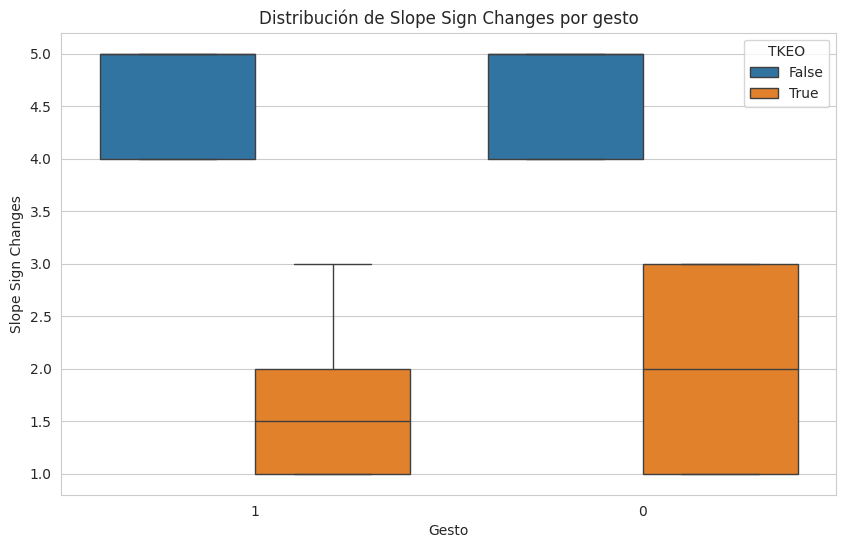

In [75]:
# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Gráfico de caja (boxplot) para la característica "Slope Sign Changes" por gesto
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Gesto', y='Slope Sign Changes', hue='TKEO', data=df)

# Añadir título y ajustes de los ejes
plt.title('Distribución de Slope Sign Changes por gesto')
plt.xlabel('Gesto')
plt.ylabel('Slope Sign Changes')
plt.legend(title='TKEO')

# Mostrar el gráfico
plt.show()